<a href="https://colab.research.google.com/github/BrianAhmadTaufik/ML-rockpaperscissors-/blob/main/rockpaperscissors_Brian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Brian Ahmad Taufik**

Submission Dicoding
Belajar Machine Learning untuk Pemula

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-17 05:20:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.02MB/s    in 3m 36s  

2021-04-17 05:24:10 (1.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validasi')
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')


In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [8]:
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [11]:
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [14]:
import zipfile,os,shutil

for file in train_rock_dir: 
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file)) 
for file in train_paper_dir: 
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file)) 
for file in train_scissors_dir: 
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir: 
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    vertical_flip = True,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [17]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  
    target_size=(150,150), 
    batch_size= 32, 
    class_mode='categorical' 
)  

validation_generator = test_datagen.flow_from_directory(
    validation_dir, 
    target_size = (150,150), 
    batch_size = 32, 
    class_mode = 'categorical' 
)   

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [18]:
Model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [19]:
Model.summary()
Model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

In [20]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97):
      print("\nAkurasi telah mencapai 97%, training dihentikan")
      self.model.stop_training = True

callbacks = myCallback()
ex = Model.fit(
          train_generator,
          steps_per_epoch = 41, 
          epochs = 20,
          validation_data = validation_generator,
          validation_steps = 27,
          verbose =2,
            callbacks=[callbacks]
)

Epoch 1/20
41/41 - 69s - loss: 1.0180 - accuracy: 0.4848 - val_loss: 0.5641 - val_accuracy: 0.7894
Epoch 2/20
41/41 - 67s - loss: 0.4279 - accuracy: 0.8453 - val_loss: 0.3438 - val_accuracy: 0.8669
Epoch 3/20
41/41 - 67s - loss: 0.2864 - accuracy: 0.8910 - val_loss: 0.2692 - val_accuracy: 0.9051
Epoch 4/20
41/41 - 66s - loss: 0.2244 - accuracy: 0.9215 - val_loss: 0.2309 - val_accuracy: 0.9178
Epoch 5/20
41/41 - 67s - loss: 0.1957 - accuracy: 0.9352 - val_loss: 0.1792 - val_accuracy: 0.9387
Epoch 6/20
41/41 - 67s - loss: 0.1529 - accuracy: 0.9436 - val_loss: 0.2691 - val_accuracy: 0.9062
Epoch 7/20
41/41 - 67s - loss: 0.1510 - accuracy: 0.9390 - val_loss: 0.2072 - val_accuracy: 0.9329
Epoch 8/20
41/41 - 67s - loss: 0.1131 - accuracy: 0.9558 - val_loss: 0.1326 - val_accuracy: 0.9572
Epoch 9/20
41/41 - 70s - loss: 0.1021 - accuracy: 0.9649 - val_loss: 0.2139 - val_accuracy: 0.9375
Epoch 10/20
41/41 - 68s - loss: 0.0829 - accuracy: 0.9726 - val_loss: 0.1154 - val_accuracy: 0.9688

Akurasi 

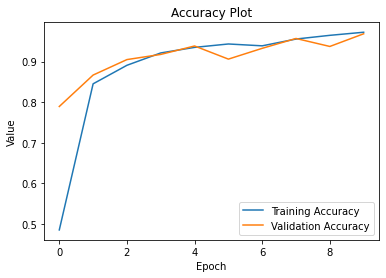

In [22]:
from matplotlib import pyplot as plt

plt.plot(ex.history['accuracy'], label='Training Accuracy')
plt.plot(ex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot') 
plt.xlabel('Epoch') 
plt.ylabel('Value') 
plt.legend(loc="lower right") 
plt.show() 

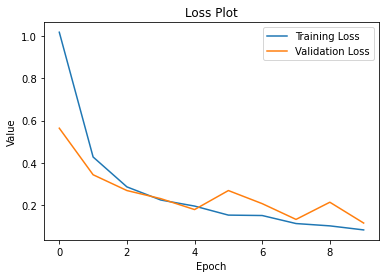

In [23]:
plt.plot(ex.history['loss'], label='Training Loss') 
plt.plot(ex.history['val_loss'], label='Validation Loss') 
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend(loc="upper right")
plt.show()

Saving 1_FnkQhOGXoRNmYFnPO3gWNA.jpeg to 1_FnkQhOGXoRNmYFnPO3gWNA (2).jpeg
1_FnkQhOGXoRNmYFnPO3gWNA.jpeg
paper


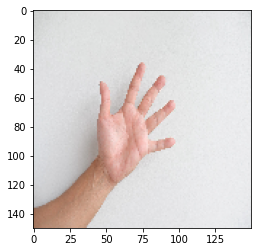

In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Upload = files.upload()

for fn in Upload.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = Model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')